1.Importing Libraries and Reading data<br>
2.Feature Engineering and Data Visualization<br>
* Some Visualization
* Name Feature
* Sex Feature
* Age Feature
* Embarked Feature
* Cabin Feature
* SibSp and Parch Feature


3.Train and Predict
* Logistic Regression
* K Nearest Neighbors
* Support Vector Machines
* Decision Tree
* Random Forest

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import re

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import  GridSearchCV,train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_df = pd.read_csv("../input/titanic/train.csv")
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv('../input/titanic/test.csv')
print(test_df.shape)
test_df.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Correlation in Data

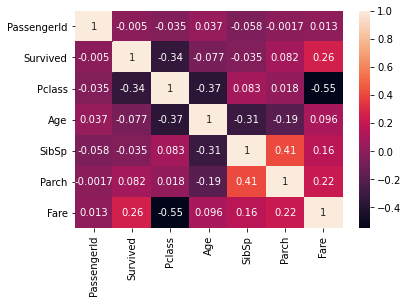

In [8]:
sns.heatmap(train_df.corr(),annot=True)

In [9]:
survived = train_df[(train_df["Sex"]=="female") & (train_df["Survived"]==1)]
print(len(survived.index))

233


In [10]:
print([train_df.groupby("Sex")["Survived"].value_counts(normalize = True)])

[Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64]


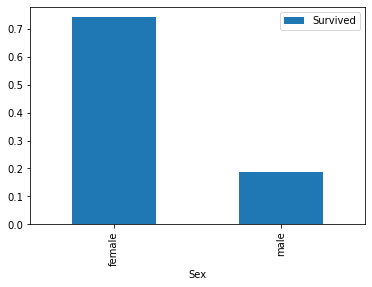

In [11]:
pivot_table = train_df.pivot_table(index="Sex",values="Survived")
pivot_table.plot.bar()
plt.show()

**Bar Chart For categorical Features**

In [12]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

**Name Feature**

In [13]:
df = [train_df,test_df]   #Combininng Train and Test Dataset
for data in df:
    data['Title'] = data['Name'].str.extract(r', (\w+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex']).transpose()

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [14]:
for data in df:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title']).mean()

labels = {'Mr':1, 'Mrs':2, 'Master':3, 'Miss':4, 'Rare':5}
test_df.replace({'Title':labels}, inplace = True)
train_df.replace({'Title':labels}, inplace = True)
train_df['Title'] = train_df['Title'].fillna(0)
train_df['Title'] = train_df['Title'].astype(int)                     # this is performed beacuse it was giving float values of title

In [15]:
pd.DataFrame({'Train':train_df.isnull().sum(), 'Test':test_df.isnull().sum()}).transpose()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
Train,177.0,687.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Test,86.0,327.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


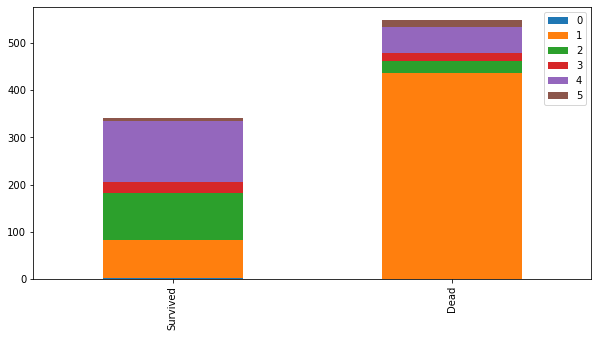

In [16]:
bar_chart('Title')

In [17]:
#Drop unnecessary feature from dataset
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [18]:
train_df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,1


**Sex Feature**

In [19]:
sex_mapping = {"male":0,"female":1}
for data in df:
    data['Sex']=data['Sex'].map(sex_mapping)

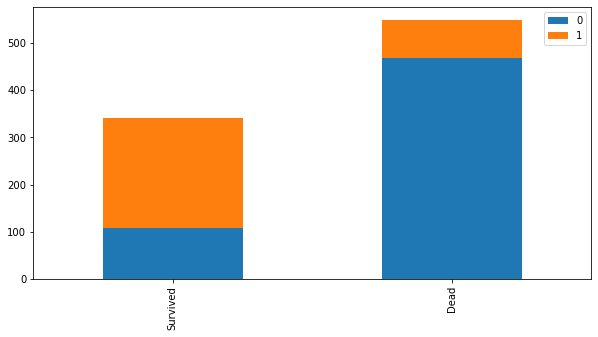

In [20]:
bar_chart('Sex')

**Age Feature**

In [21]:
print('Missing Values in Age column: ',177/len(train_df['Age'])*100)
print('Missing Values in Cabin column: ',687/len(train_df['Cabin'])*100)
print('Missing Values in Embarked column: ',2/len(train_df['Embarked'])*100)

Missing Values in Age column:  19.865319865319865
Missing Values in Cabin column:  77.10437710437711
Missing Values in Embarked column:  0.22446689113355783


* Age column has 20% of missing values.Age Feature is important to survival,so we attemplt to fill these gaps.<br>
* We will drop Cabin column because it is not possible to fill 77% missing values.<br>
* Embarked column has 0.2% of missing values won't causing any issue. 

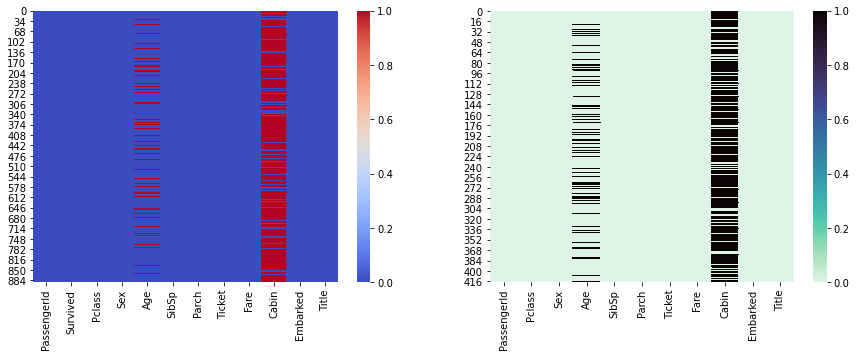

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,5))
sns.heatmap(train_df.isnull(), cmap = 'coolwarm', ax = ax1)
sns.heatmap(test_df.isnull(), cmap = 'mako_r', ax = ax2)

In [23]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df["Age"].fillna(test_df.groupby("Title")["Age"].transform("median"), inplace=True)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


**Age Distribution**

In [26]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Rare)
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df["Age"].fillna(test_df.groupby("Title")["Age"].transform("median"), inplace=True)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [28]:
for data in df:
    data.loc[ data['Age'] <= 16, 'Age'] = 0,
    data.loc[(data['Age'] > 16) & (data['Age'] <= 26), 'Age'] = 1,
    data.loc[(data['Age'] > 26) & (data['Age'] <= 36), 'Age'] = 2,
    data.loc[(data['Age'] > 36) & (data['Age'] <= 62), 'Age'] = 3,
    data.loc[ data['Age'] > 62, 'Age'] = 4

In [29]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,1


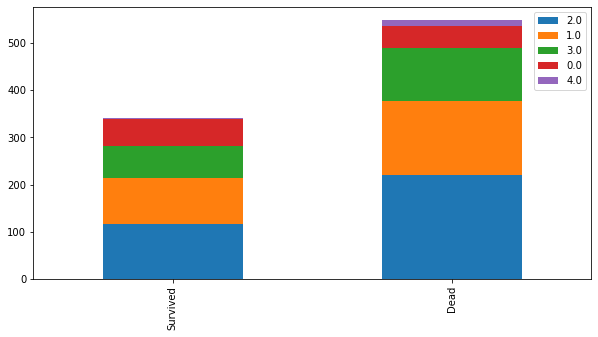

In [30]:
bar_chart('Age')

**Embarked feature**

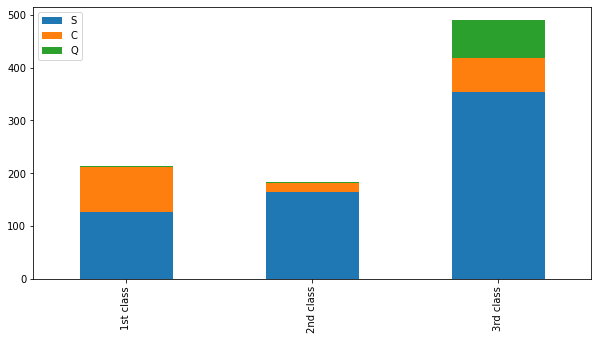

In [31]:
Pclass1 = train_df[train_df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

More than 50% of 1st class are from S Embark.<br>
More than 50% of 2nd class are from S Embark.<br>
More than 50% of 3rd class are from S Embark.

In [32]:
train_df['Embarked'].fillna('S', inplace = True)

label = {'S':1, 'C':2, 'Q':3}
train_df.replace({'Embarked':label}, inplace = True)
test_df.replace({'Embarked':label}, inplace = True)

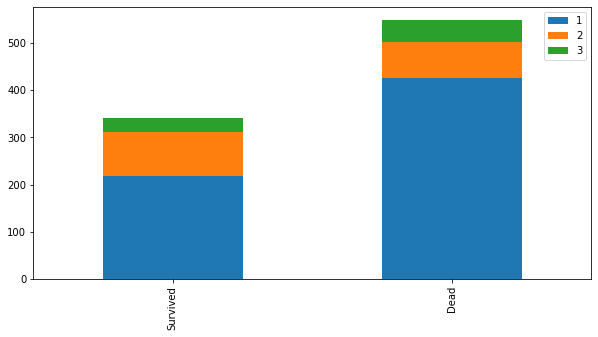

In [33]:
bar_chart('Embarked')

**Fare feature**

In [34]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace = True)

In [35]:

train_df['Fare'] = pd.qcut(train_df['Fare'], 4, labels = [1, 2, 3, 4])
test_df['Fare'] = pd.qcut(test_df['Fare'], 4, labels = [1, 2, 3, 4])

In [36]:
df_m = train_df[train_df['Survived'] == 0]
df_f = train_df[train_df['Survived'] == 1]
df_m = df_m['Fare'].value_counts()
df_f = df_f['Fare'].value_counts()

trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'Not Survived', marker = dict(color = 'coral'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'Survived', marker = dict(color = 'teal'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 500, title='Fare Distribution')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

**Cabin Feature**

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


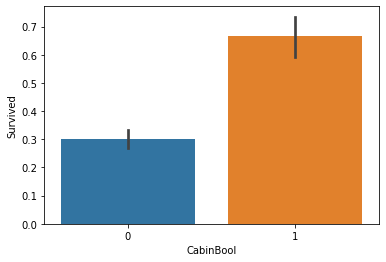

In [37]:
train_df["CabinBool"] = (train_df["Cabin"].notnull().astype('int'))
test_df["CabinBool"] = (test_df["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train_df["Survived"][train_df["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train_df["Survived"][train_df["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train_df)
plt.show()

**SibSp and Parch Feature**

In [38]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [39]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [40]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinBool,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,1,NaN,1,1,0,2
1,2,1,1,1,3.0,1,0,PC 17599,4,C85,2,2,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,2,NaN,1,4,0,1


In [41]:
test_df.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinBool,FamilySize
0,892,3,0,2.0,0,0,330911,1,NaN,3,1,0,1
1,893,3,1,3.0,1,0,363272,1,NaN,1,2,0,2
2,894,2,0,3.0,0,0,240276,2,NaN,3,1,0,1


In [42]:
train_df.drop(['PassengerId','Ticket', 'Age', 'SibSp', 'Parch','Cabin'], axis = 1, inplace = True)
test_df.drop(['Ticket', 'Age', 'SibSp', 'Parch','Cabin'], axis = 1, inplace = True)

In [44]:
train_df.head(5)

,Survived,Pclass,Sex,Fare,Embarked,Title,CabinBool,FamilySize
0,0,3,0,1,1,1,0,2
1,1,1,1,4,2,2,1,2
2,1,3,1,2,1,4,0,1
3,1,1,1,4,1,2,1,2
4,0,3,0,2,1,1,0,1


**Now it's time to train our data using different Algorithms**

In [46]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Logistic Regression**

In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
lr_train_acc = round(lr.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', lr_train_acc)
lr_test_acc = round(lr.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       173
           1       0.71      0.75      0.73        95

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

Training Accuracy:  79.13
Testing Accuracy:  80.22


**K Nearest Neighbors**

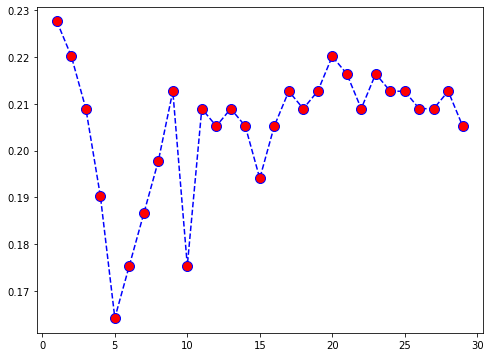

In [52]:
error_rate= []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize = (8,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

print('Classification Report: \n',classification_report(y_pred,y_test))
knn_train_acc = round(knn.score(X_train,y_train)*100,2)
print('Training Accuracy:',knn_train_acc)
knn_test_acc = round(knn.score(X_test,y_test)*100,2)
print('Testing Accuracy:',knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       164
           1       0.80      0.77      0.78       104

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.83      0.84      0.84       268

Training Accuracy: 84.11
Testing Accuracy: 83.58


**Support Vector Machines**

In [54]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Classification Report: \n',classification_report(y_pred,y_test))
svc_train_acc = round(svc.score(X_train,y_train)*100,2)
print('Training Accuracy:',svc_train_acc)
svc_test_acc = round(svc.score(X_test,y_test)*100,2)
print('Testing Accuracy:',svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       169
           1       0.75      0.76      0.75        99

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

Training Accuracy: 83.63
Testing Accuracy: 81.72


**Decision Tree**

In [55]:
dt =DecisionTreeClassifier(min_samples_split=70,min_samples_leaf=10)
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)

print('Classification Report: \n',classification_report(y_pred,y_test))
dt_train_acc = round(dt.score(X_train,y_train)*100,2)
print('Training Accuracy:',dt_train_acc)
dt_test_acc = round(dt.score(X_test,y_test)*100,2)
print('Testing Accuracy:',dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       169
           1       0.75      0.76      0.75        99

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

Training Accuracy: 82.83
Testing Accuracy: 81.72


**Random Forest**

In [57]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print('Classification Report: \n',classification_report(y_pred,y_test))
rf_train_acc = round(rf.score(X_train,y_train)*100,2)
print('Training Accuracy:',rf_train_acc)
rf_test_acc = round(rf.score(X_test,y_test)*100,2)
print('Testing Accuracy:',rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       169
           1       0.75      0.76      0.75        99

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

Training Accuracy: 87.8
Testing Accuracy: 80.6


In [58]:
test_df['Fare'] = pd.to_numeric(test_df['Fare'])

In [59]:
test_df['Survived'] = rf.predict(test_df.drop(['PassengerId'], axis = 1))
test_df[['PassengerId', 'Survived']].to_csv('MySubmission.csv', index = False)